# Clustering Time Series : Analysis of Housing Prices in Bexar County 
### Objective:
The objective of this project is to cluster housing regions in Bexar County, TX based on the house prices and gain insight into the housing market in Bexar County.


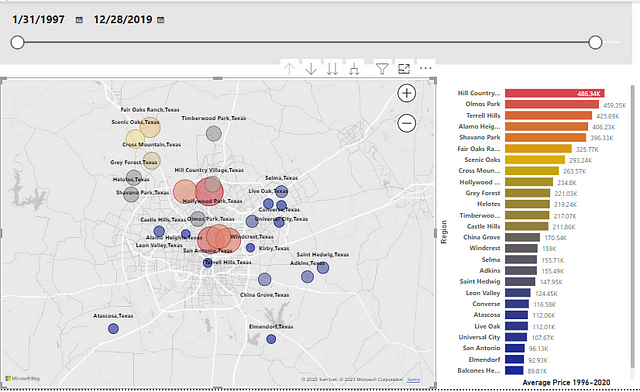




### Dataset:
The dataset from Zillow Housing prince in Kaggle.

### Approach:
The project will use time series clustering techniques, specifically KMeans. 

In [1118]:
# importing libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import glob,re
rcParams['figure.figsize'] = (20, 10)
sns.set_context('poster')
import warnings
warnings.filterwarnings('ignore')

In [1119]:
files = glob.glob('City_Zhvi_*bedroom.csv')
dfs = []
for file in files:
    df = pd.read_csv(file,index_col='Unnamed: 0')
    df['rooms'] = file
    
    dfs.append(df)
all_rooms = pd.concat(dfs, ignore_index=True)
# create a feature for the bedroom numbers
all_rooms['rooms']=all_rooms['rooms'].apply(lambda x:re.findall('\d+',x)[0])
all_rooms.shape

(87521, 300)

(96, 300)


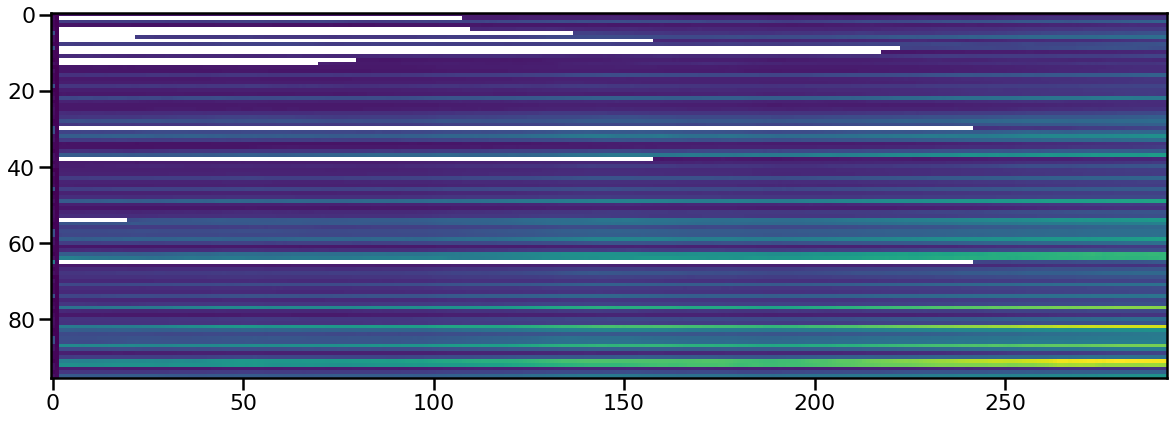

In [1120]:
# extracting Bexar County ! if you wanna change the county you do that herer. 
df_all=all_rooms[all_rooms['CountyName']=='Bexar County']
print(df_all.shape)
# plot nan values 
import matplotlib
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='red')
plt.imshow(df_all.select_dtypes('number'))

In [1121]:
# drop unncessary features and featues with nan values 
df_all.drop(['RegionType','SizeRank','State'],axis=1,inplace=True)
df_all.dropna(inplace=True)

In [1122]:
# check nan values
print(df_all.shape)
#df_all[['rooms','RegionName']].groupby('RegionName').value_counts().unstack()

(83, 297)


In [1123]:
# set the index to be multi index of the region and romms number 
bexar_all_rooms=df_all.set_index(['RegionName','rooms']).iloc[:,5:]



In [1124]:
# set up date index 
date_col=df_all.iloc[:,6:].columns.tolist()

In [1155]:
#houses with median housing size in  the Bexar county cities 
all_city=pd.pivot_table(data=df_all,values=date_col,columns=['RegionName','CountyName','StateName'],aggfunc='median')
all_city.index=pd.to_datetime(all_city.index)
print(all_city.isna().sum().sum())
all_city_TX=all_city.dropna(axis=1)
all_city_TX.isna().sum()

0


RegionName            CountyName    StateName
Adkins                Bexar County  TX           0
Alamo Heights         Bexar County  TX           0
Atascosa              Bexar County  TX           0
Balcones Heights      Bexar County  TX           0
Castle Hills          Bexar County  TX           0
China Grove           Bexar County  TX           0
Converse              Bexar County  TX           0
Cross Mountain        Bexar County  TX           0
Elmendorf             Bexar County  TX           0
Fair Oaks Ranch       Bexar County  TX           0
Grey Forest           Bexar County  TX           0
Helotes               Bexar County  TX           0
Hill Country Village  Bexar County  TX           0
Hollywood Park        Bexar County  TX           0
Kirby                 Bexar County  TX           0
Leon Valley           Bexar County  TX           0
Live Oak              Bexar County  TX           0
Olmos Park            Bexar County  TX           0
Saint Hedwig          Bexar County  

In [1126]:
#all_city_TX.head()

In [1156]:
# reduce the columns name to Region only and save it as csv 
region_names=all_city_TX.columns.get_level_values('RegionName').tolist()
all_city_TX.columns=region_names
#all_city_TX.head()
#all_city_TX.to_csv('bexar_county_all.csv')


Text(0, 0.5, 'Price')

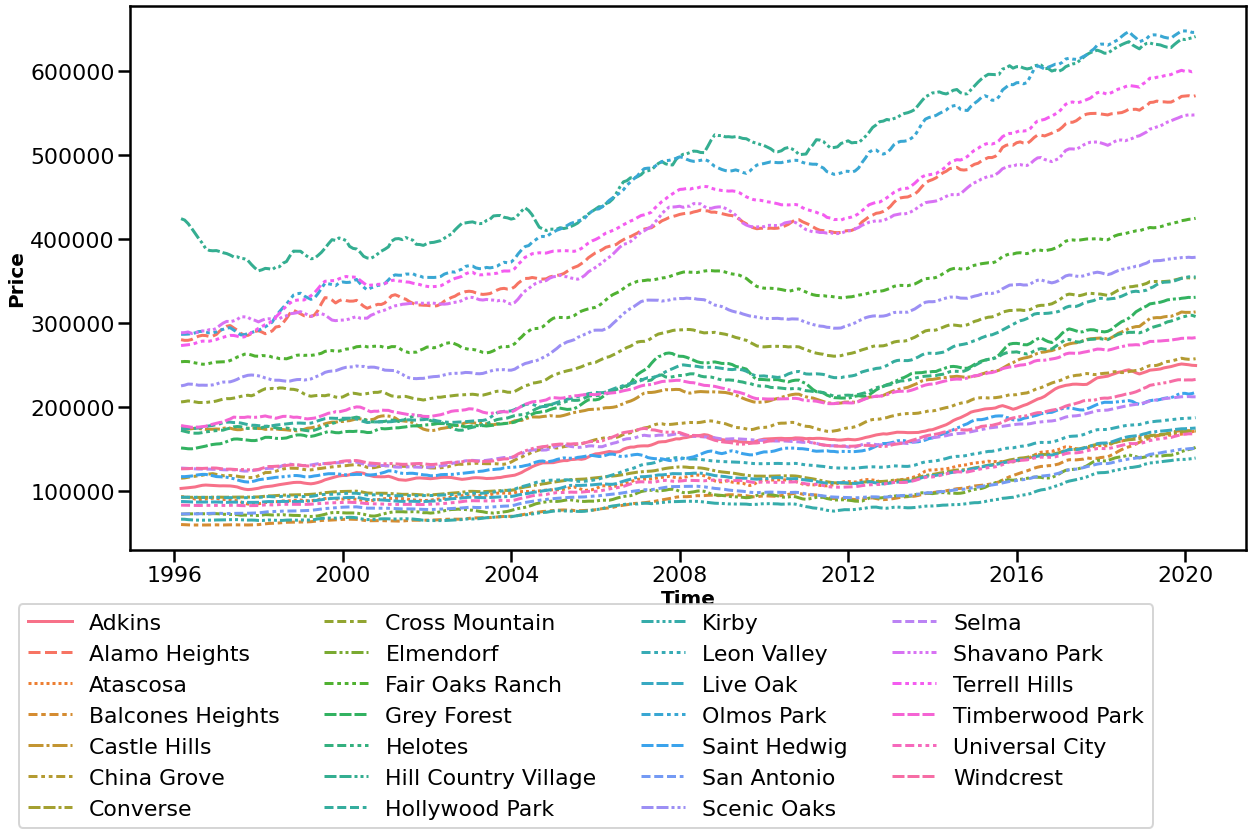

In [1128]:
# plots
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.lineplot(data=all_city_TX,ax=ax)
ax.legend(bbox_to_anchor=(-0.1, -0.1),loc='upper left',borderaxespad=0,ncol=4)
ax.set_xlabel('Time',fontsize=20, fontweight="bold")
ax.set_ylabel('Price',fontsize=20, fontweight="bold")

Text(0, 0.5, 'Price')

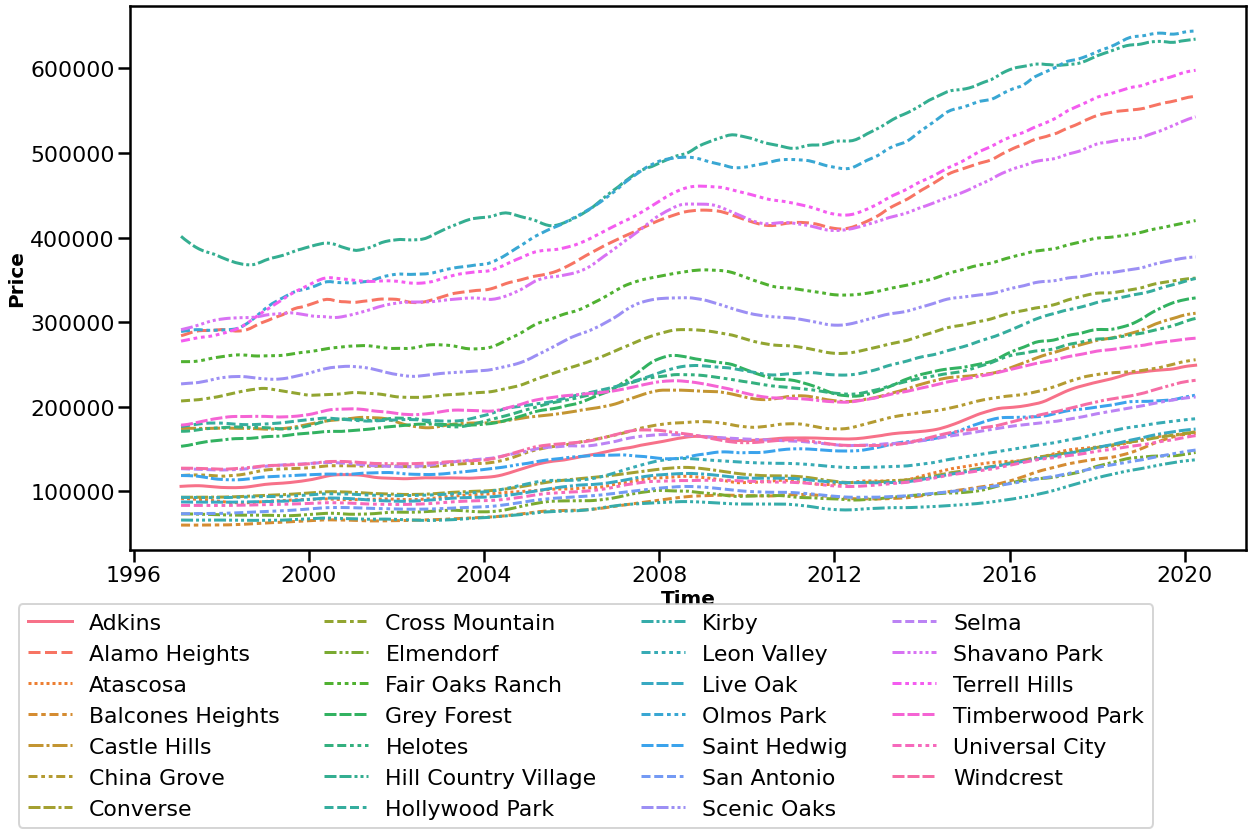

In [1129]:
# moveing averag for 1 year
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.lineplot(data=all_city_TX.rolling(window=12).mean(),ax=ax)
ax.legend(bbox_to_anchor=(-0.1, -0.1),loc='upper left',borderaxespad=0,ncol=4)
ax.set_xlabel('Time',fontsize=20, fontweight="bold")
ax.set_ylabel('Price',fontsize=20, fontweight="bold")

In [1130]:
# the growth rate of the housing in Bexar county over the two decates 
def calculate_growth_rate(start_prices, end_prices):
    if isinstance(start_prices, pd.DataFrame):
        start_prices = start_prices.values
    if isinstance(end_prices, pd.DataFrame):
        end_prices = end_prices.values
    growth_rates = ((end_prices - start_prices) / start_prices) * 100
    return growth_rates
gr=pd.DataFrame(calculate_growth_rate(all_city_TX.iloc[1,:],all_city_TX.iloc[-1,:]),columns=['GR'])

Text(0.5, 1.0, 'Growth Rate 1996-2020')

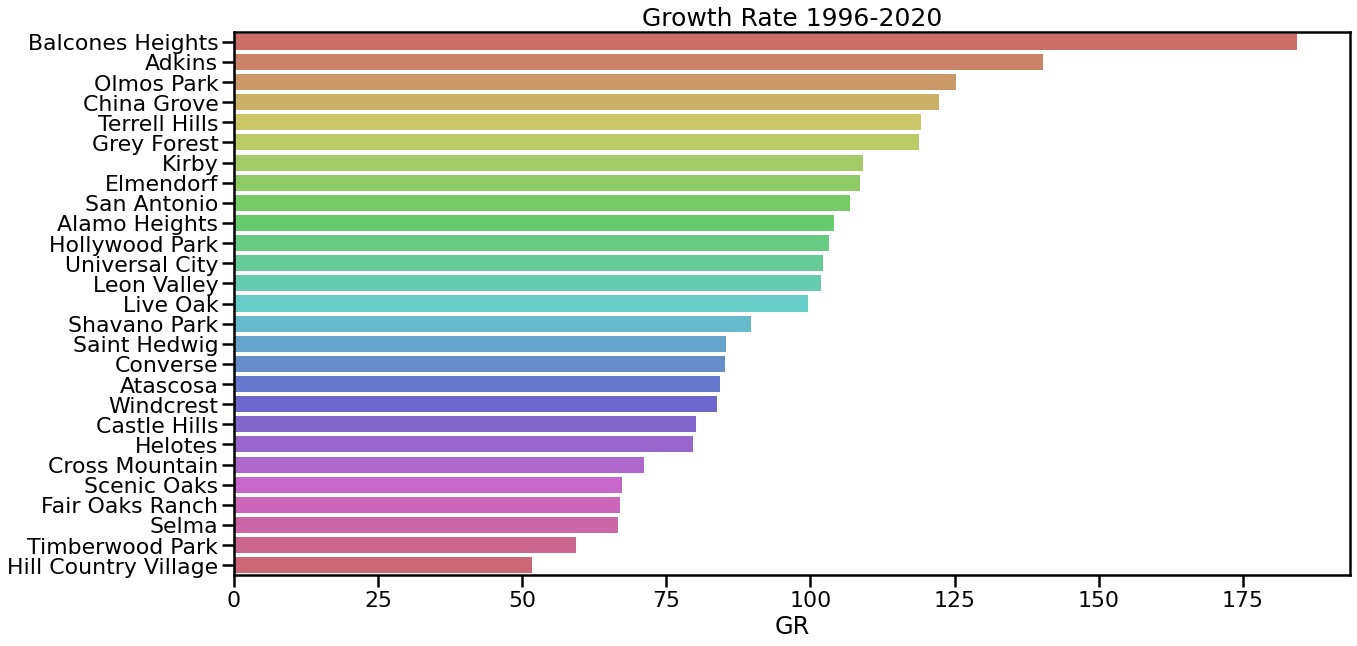

In [1131]:
ax=sns.barplot(y=gr.index,x=gr['GR'],order=gr.sort_values(by='GR',ascending=False).index.tolist(),palette = 'hls')
ax.set_title('Growth Rate 1996-2020',fontsize=25)

In [1132]:
# convert the index to only year for ploting
yearly_price=all_city_TX.resample('Y').mean().dropna()
yearly_price.index=yearly_price.index.strftime('%Y')#.pct_change(axis=0).T*100


Text(0.5, 1.0, 'Annual Growth Rate')

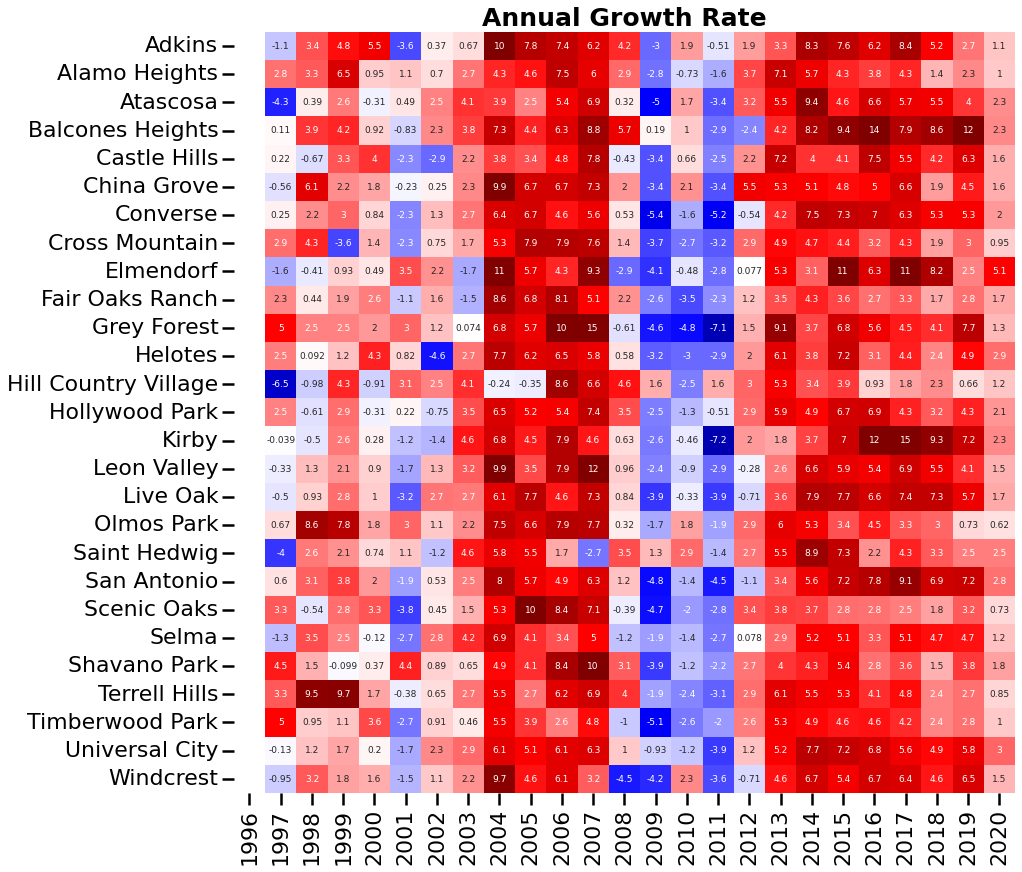

In [1133]:
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(ax=ax,data=yearly_price.pct_change(axis=0).mul(100).T,annot_kws={'fontsize':9},
            square=False,cmap='seismic',annot=True,vmin=-10,vmax=+10,cbar=False)

ax.set_title('Annual Growth Rate',fontsize=25, fontweight="bold")


Index(['2009', '2010', '2011'], dtype='object')


Text(0.5, 1.0, 'Sum of the Annual Growth Rate 2008-2010')

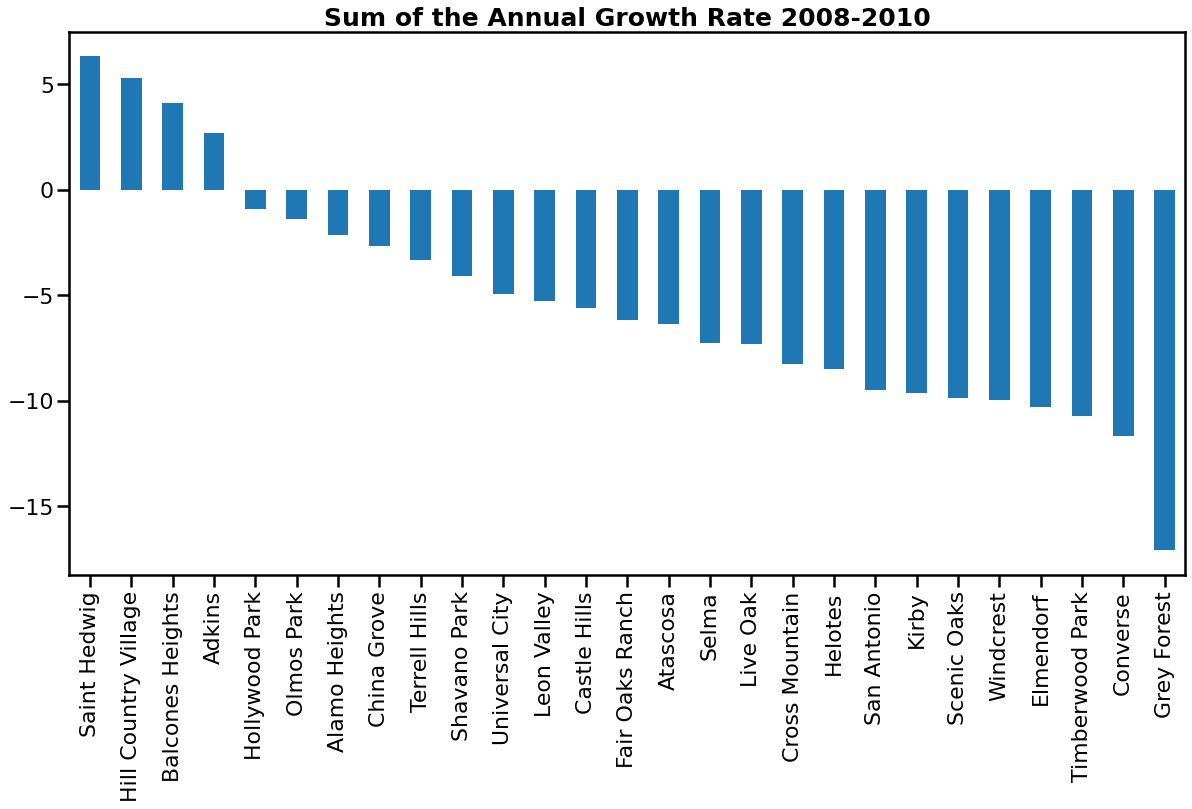

In [1134]:
print(yearly_price.pct_change(axis=0).mul(100)[13:16].index);
ax=yearly_price.pct_change(axis=0).mul(100)[12:16].sum().sort_values(ascending=False).plot.bar();
ax.set_title('Sum of the Annual Growth Rate 2008-2010',fontsize=25, fontweight="bold")

# Introduction to Dynamic Time Warping with simple example 

In [1135]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

def dtw(x_norm, y_norm, dist='euclidean'):
    """
    Dynamic Time Warping algorithm.
    :param x: Numpy array containing the first sequence.
    :param y: Numpy array containing the second sequence.
    :param dist: Distance function used to compare the elements of the sequences.
    :return: The minimum distance between the two sequences, the DTW matrix and the warp path.
    """
    D = cdist(x_norm.reshape(-1, 1), y_norm.reshape(-1, 1), dist)
    n = len(x_norm)
    m = len(y_norm)
    DTW = np.zeros((n + 1, m + 1))
    DTW[1:, 0] = np.inf
    DTW[0, 1:] = np.inf

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = D[i - 1, j - 1]
            DTW[i, j] = cost + np.min([DTW[i - 1, j], DTW[i, j - 1], DTW[i - 1, j - 1]])

    # Compute the warp path
    i, j = n, m
    path = [(i, j)]
    while i > 1 or j > 1:
        if i == 1:
            j -= 1
        elif j == 1:
            i -= 1
        else:
            prev = np.argmin([DTW[i - 1, j], DTW[i, j - 1], DTW[i - 1, j - 1]])
            if prev == 0:
                i -= 1
            elif prev == 1:
                j -= 1
            else:
                i -= 1
                j -= 1
        path.append((i, j))

    path.append((0, 0))

    return DTW[n, m], DTW, path


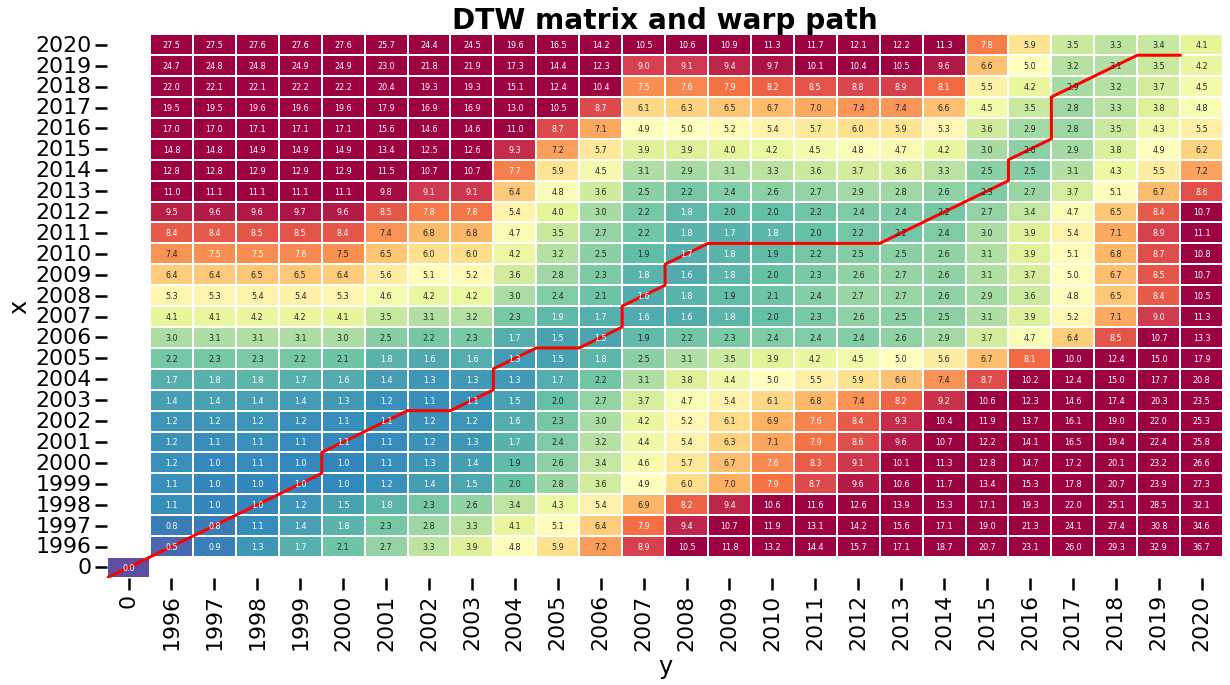

The DTW distance between x and y is 4.057397066761978


In [1136]:
# example
move_ave=all_city_TX.resample('Y').mean().dropna()
time=move_ave.index.year
x1 = move_ave['Alamo Heights'].values
y1 = move_ave['Elmendorf'].values
x= (x1 - np.mean(x1)) / np.std(x1)
y = (y1 - np.mean(y1)) / np.std(y1)

dtw_distance, dtw_matrix, warp_path = dtw(x, y, dist='euclidean')
###

years=[0]
years.extend(move_ave.index.year.tolist())
ax=sns.heatmap(dtw_matrix, linewidths=0.005,cbar=False ,
               xticklabels=years,cmap='Spectral_r', annot=True, yticklabels=years,
               fmt='.1f',annot_kws={'fontsize':8},vmin=0,vmax=10,)
ax.invert_yaxis()
ax.plot([j for (i, j) in warp_path], [i for (i, j) in warp_path], color='red')
ax.set_xlabel('y')
ax.set_ylabel('x')
ax.set_title('DTW matrix and warp path', fontsize=28, fontweight="bold")
#ax.axis("off")
ax.autoscale(False)
#ax.set_aspect ("equal") 
plt.xticks(rotation=90)

plt.show()

print(f"The DTW distance between x and y is {dtw_distance}")


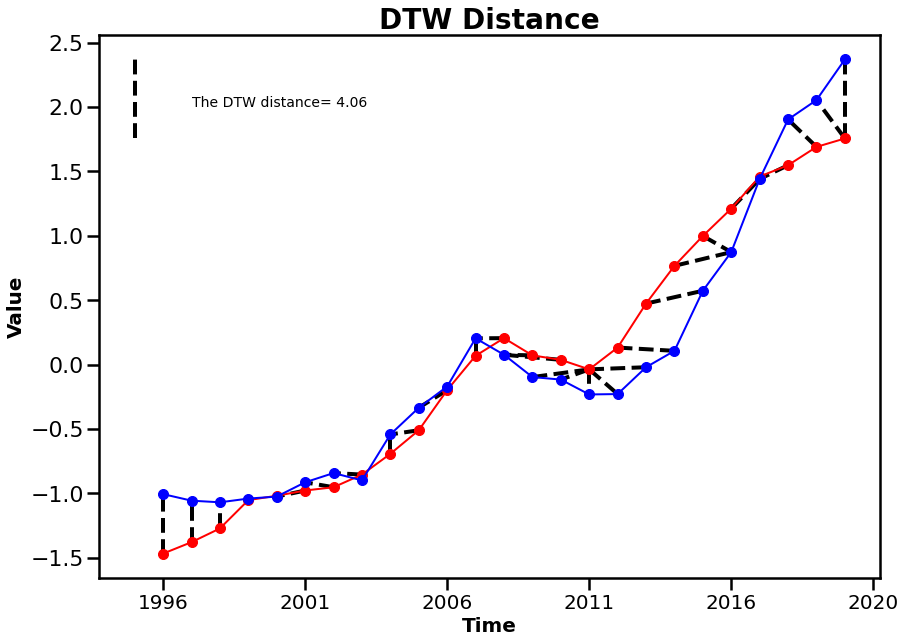

In [1137]:
fig, ax = plt.subplots(figsize=(14, 10))
for [map_x, map_y] in warp_path:
    ax.plot([map_x-1, map_y-1], [x[map_x-1], y[map_y-1]], '--k', linewidth=4)

ax.plot(x, '-ro', label='x', linewidth=2, markersize=10, markerfacecolor='red')
ax.plot(y, '-bo', label='y', linewidth=2, markersize=10, markerfacecolor='blue')
ax.set_title("DTW Distance", fontsize=28, fontweight="bold")
# Set the axis labels and legend
ax.set_xlabel('Time',fontsize=20, fontweight="bold")
ax.set_ylabel('Value',fontsize=20, fontweight="bold")
ax.set_xticklabels([0,1996, 2001, 2006, 2011, 2016,2020,2025],fontsize=20)
ax.text(1, 2, f"The DTW distance= {np.round(dtw_distance,2)}", fontsize=14)
#ax.legend()
plt.show()
fig.savefig("ex1_dtw_distance.png", **savefig_options)

Text(1, 2, 'The euclidean distance= 1.51')

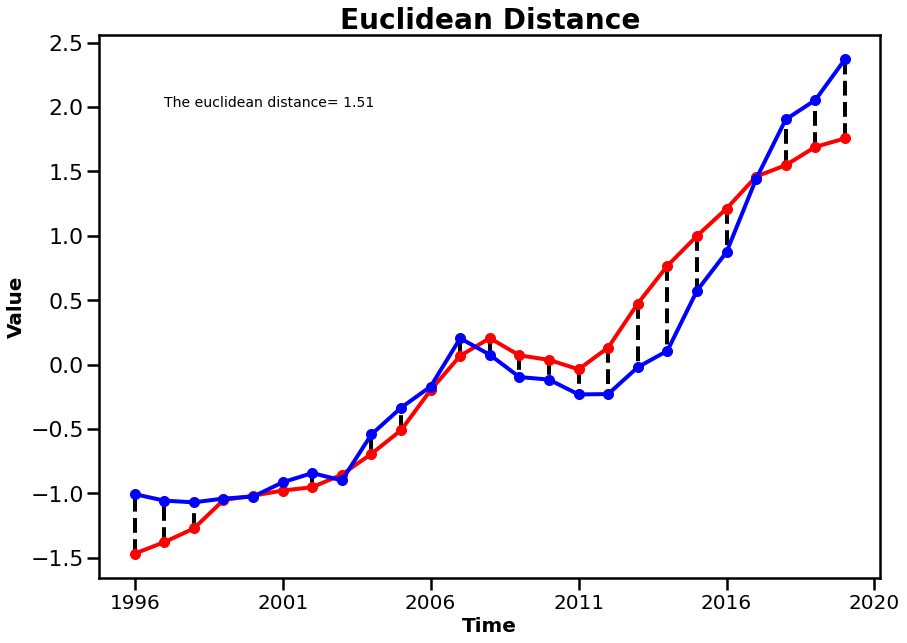

In [1138]:
def calc_euclidean(x, y):
    return np.sqrt(np.sum((x - y) ** 2))
euclidean_distance= calc_euclidean(x.reshape(-1,1),y.reshape(-1,1))


fig, ax = plt.subplots(figsize=(14, 10))
xx = [(i, x[i]) for i in np.arange(0, len(x))]
yy = [(j, y[j]) for j in np.arange(0, len(y))]

for i, j in zip(xx, yy):
    ax.plot([i[0], j[0]], [i[1], j[1]], '--k', linewidth=4)


ax.plot(x, '-ro', label='x', linewidth=4, markersize=10, markerfacecolor='red')
ax.plot(y, '-bo', label='y', linewidth=4, markersize=10, markerfacecolor='blue')
ax.set_xlabel('Time',fontsize=20, fontweight="bold")
ax.set_ylabel('Value',fontsize=20, fontweight="bold")
ax.set_title("Euclidean Distance", fontsize=28, fontweight="bold")
ax.set_xticklabels([0,1996, 2001, 2006, 2011, 2016,2020,2025],fontsize=20)
ax.text(1, 2, f"The euclidean distance= {np.round(euclidean_distance,2)}", fontsize=14)
#fig.savefig("ex1_euclidean_distance.png", **savefig_options)

# Clustering time series 

In [1139]:
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
seed = 0


In [1140]:
import numpy as np
from tslearn.metrics import dtw,  cdist_dtw
from tslearn.clustering import silhouette_score


## Finding how many clusters using Elbow method

In [1141]:
def elbow_method(X, max_k,metric='dtw'):
    """
    Performs the Elbow Method for determining the optimal number of clusters in k-means clustering.

    Parameters:
        -- X: numpy array or pandas DataFrame
            The input data for clustering.
        -- max_k: int
            The maximum number of clusters to consider.

    Returns:
        -- k_optimal: int
            The optimal number of clusters determined by the Elbow Method.
        -- inertia: list
            The list of inertia values for each number of clusters.
    """
    # Initialize lists to store the inertia values
    inertia = []

    # Loop through the range of cluster numbers
    for k in range(1, max_k+1):
        # Initialize and fit k-means clustering model
        kmeans = TimeSeriesKMeans(n_clusters=k,metric=metric, max_iter=10,n_jobs=10,
                         verbose=False,
                            random_state=42)
        kmeans.fit(X)
        # Append the inertia value to the list
        inertia.append(kmeans.inertia_)

    # Plot the inertia values
    plt.plot(range(1, max_k+1), inertia, 'bo-')


    # Calculate the silhouette score for each number of clusters
    silhouette_scores = [silhouette_score(X, TimeSeriesKMeans(n_clusters=k,metric=metric, max_iter=10,n_jobs=10,
                         verbose=False,
                            random_state=42).fit_predict(X)) for k in range(2, max_k+1)]

    # Find the optimal number of clusters based on the maximum silhouette score
    k_optimal = np.argmax(silhouette_scores) + 2
    #plt.axvline(x=k_optimal, color='r', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    return (f'Silhouette score shows k= {k_optimal}')


In [1142]:
def plot_time_series_clusters(train_data, n_clusters,metric='dtw'):
    """
    Performs time series clustering using TimeSeriesKMeans from tslearn package and
    plots the time series data for each cluster.

    Parameters:
        -- train_data: numpy array or pandas DataFrame
            The time series data to cluster.
        -- n_clusters: int
            The number of clusters to form.
        -- sz: int, optional (default=0)
            The length of the time series data.

    Returns:
        y_pred
    """
    # Initialize TimeSeriesKMeans model
    euc_km = TimeSeriesKMeans(n_clusters=n_clusters,metric=metric, verbose=True, random_state=42)

    # Fit and predict clusters on the time series data
    y_pred = euc_km.fit_predict(train_data)
    
       
    # Plot time series data for each cluster
    for yi in range(n_clusters):
        plt.subplot(3, 3, 1 + yi)
        for xx in train_data[y_pred == yi]:
            plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(euc_km.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, sz)
        plt.text(0.55, 0.85, 'Cluster %d' % (yi + 1), transform=plt.gca().transAxes)
        if yi == 1:
            plt.title("Euclidean $k$-means")

    plt.tight_layout()
    plt.show()
    return y_pred


In [1143]:
# resample the time seriese per year 
annual_average=all_city_TX.resample('Y').mean()


In [1144]:
# using moveing average data output for clustering. 
real_price_data=annual_average.T.copy()
input_data=annual_average.diff().dropna().T.copy()
norm_input_data = TimeSeriesScalerMeanVariance(std=1).fit_transform(input_data)# remving the mean of the data. 
sz = norm_input_data.shape[1]
print(norm_input_data.shape,norm_input_data.shape)


(27, 24, 1) (27, 24, 1)


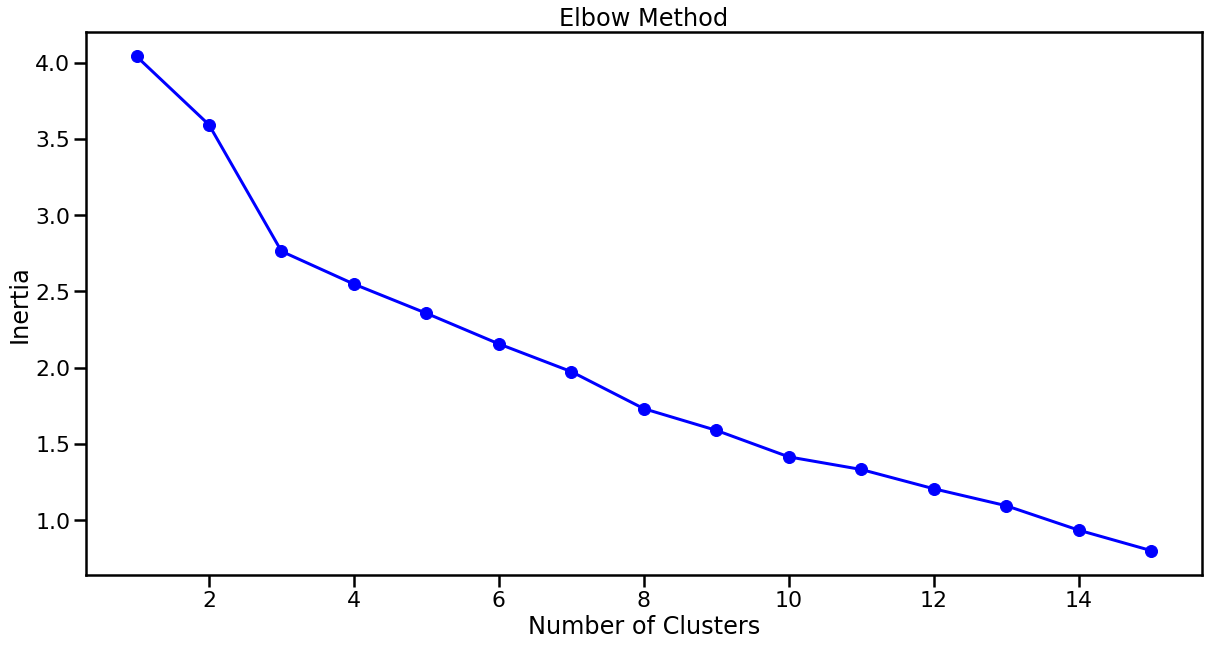

'Silhouette score shows k= 3'

In [1145]:
# elbow method on standrized prices in order to catch the series that similar in pattern 
elbow_method(norm_input_data,15,'dtw')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished


3.914 --> 2.925 --> 2.849 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


2.763 --> 2.763 --> 


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.0s finished


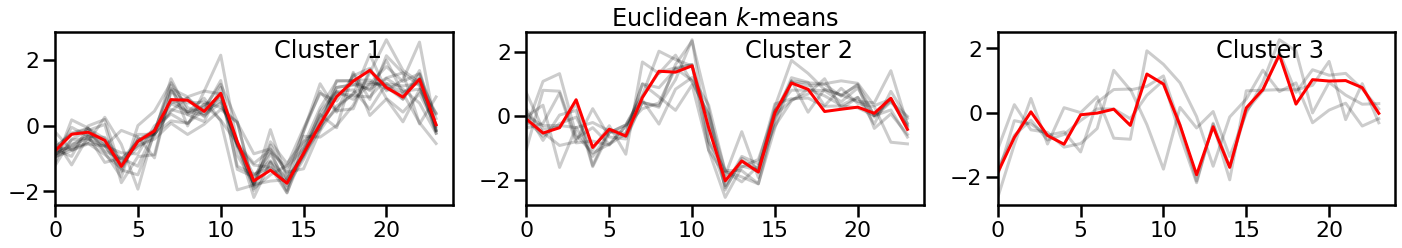

array([0, 1, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 1, 1, 0, 0], dtype=int64)

In [1146]:

pred_norm=plot_time_series_clusters(norm_input_data, 3,'dtw')
pred_norm

In [1147]:
Bexar_county=annual_average.T.reset_index()
Bexar_county['cluster_normalizedprices']=pred_norm

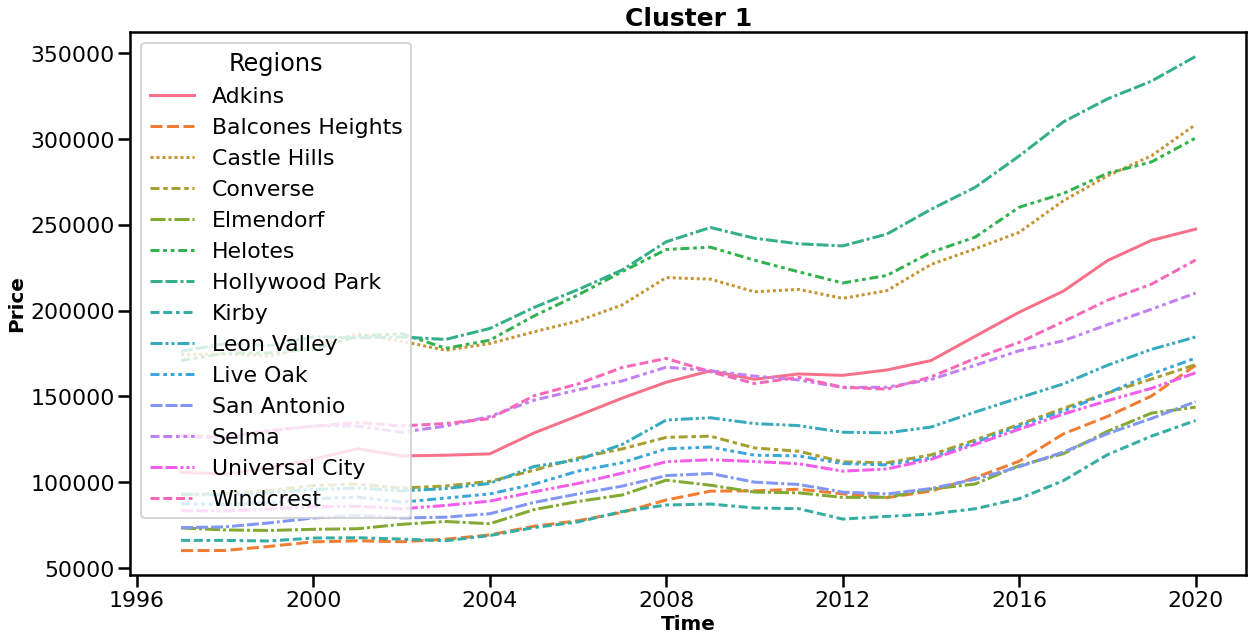

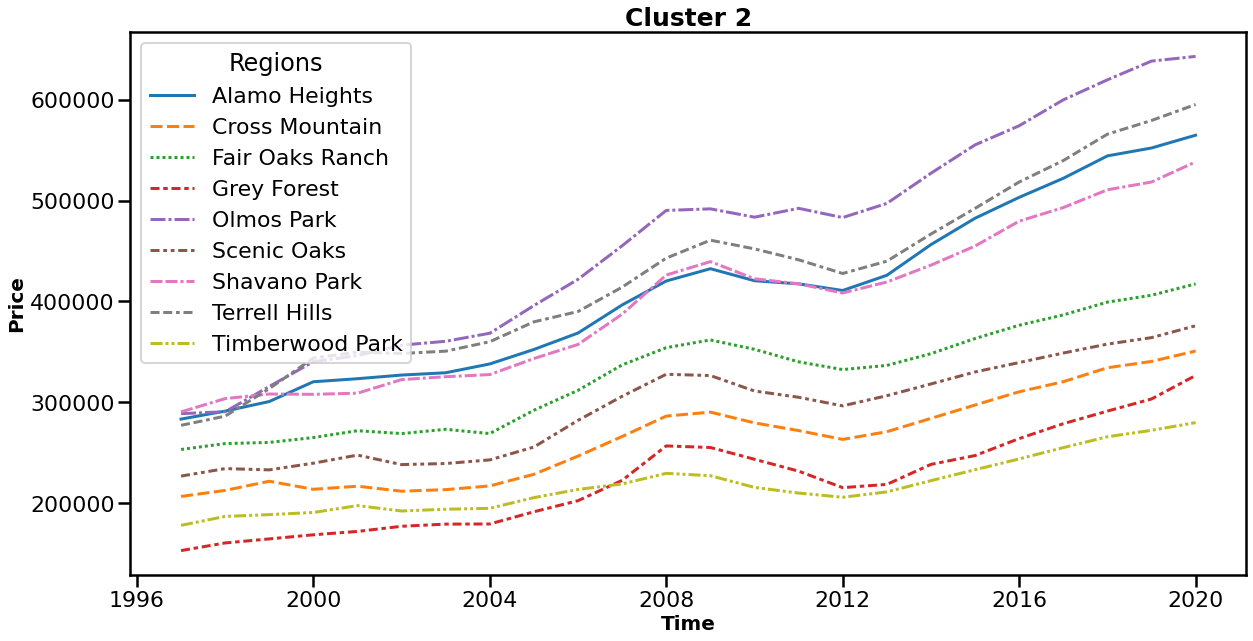

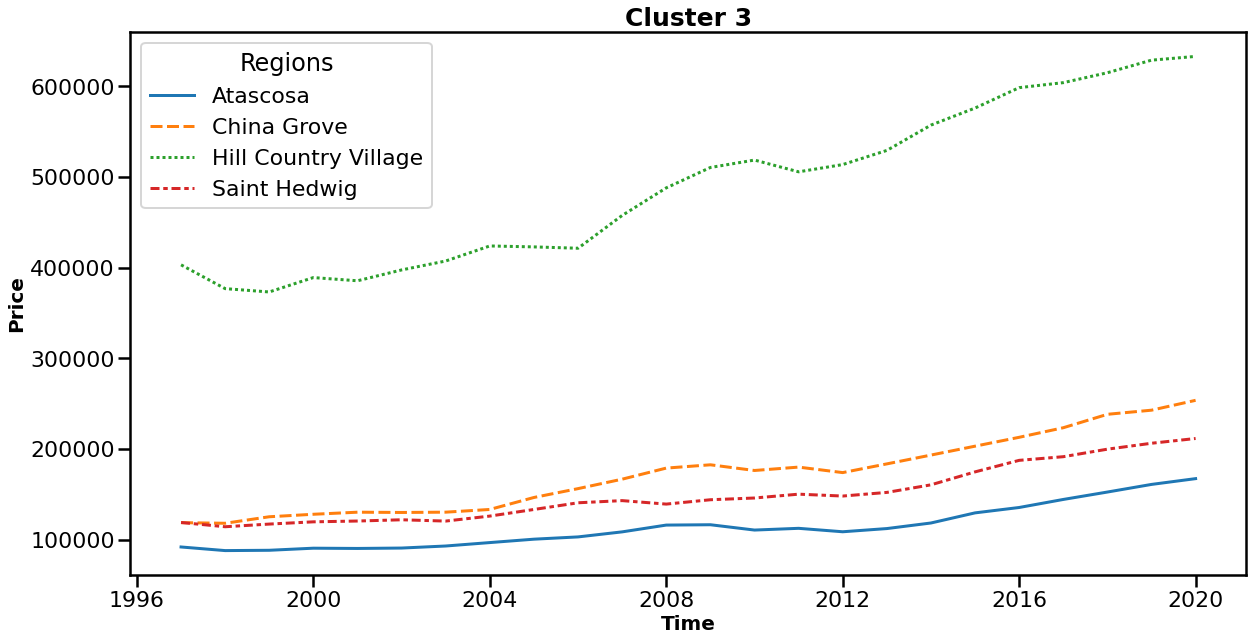

In [1148]:
for i in [0,1,2]:
    plt.figure()
    sns_plot=Bexar_county[Bexar_county['cluster_normalizedprices']==i].set_index('index').rename_axis('Regions').T.iloc[:-2,:]
    ax=sns.lineplot(data=sns_plot)
    ax.set_title(f'Cluster {i+1}',fontsize=25, fontweight="bold")
    ax.set_xlabel('Time',fontsize=20, fontweight="bold")
    ax.set_ylabel('Price',fontsize=20, fontweight="bold")
    plt.show()

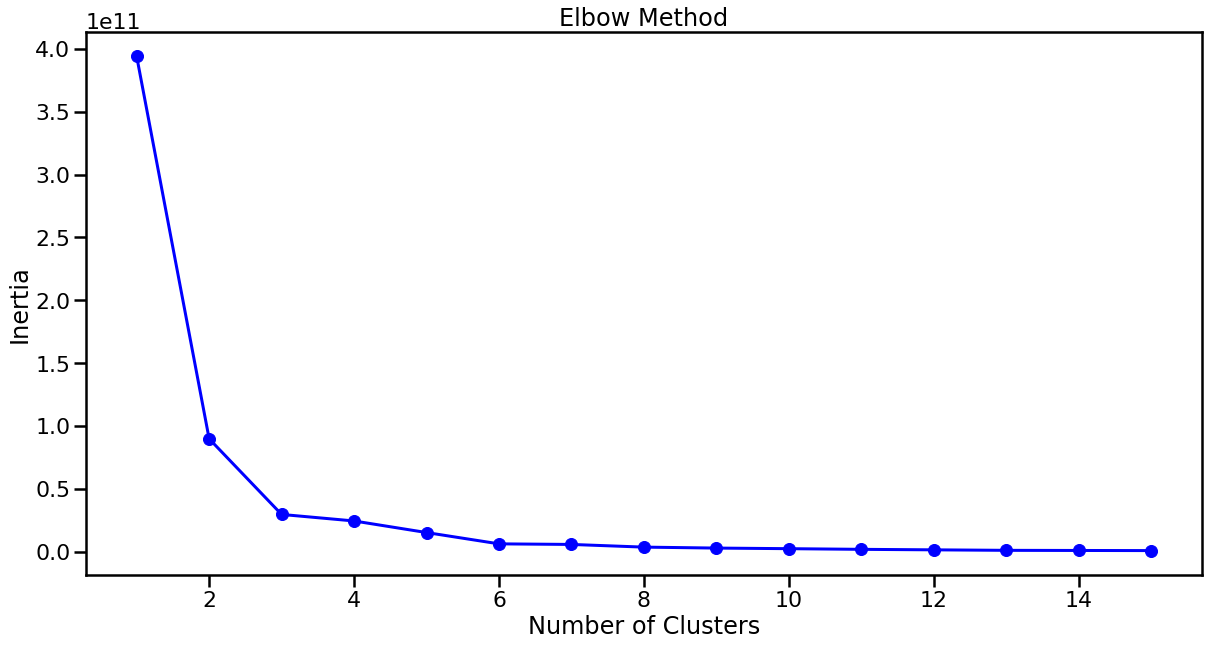

'Silhouette score shows k= 3'

In [1149]:
# elbow method on real prices to cluster the time series based on the price. 
elbow_method(real_price_data,15,'euclidean')


39193769141.383 --> 32384525985.814 --> 29638874961.677 --> 29638874961.677 --> 


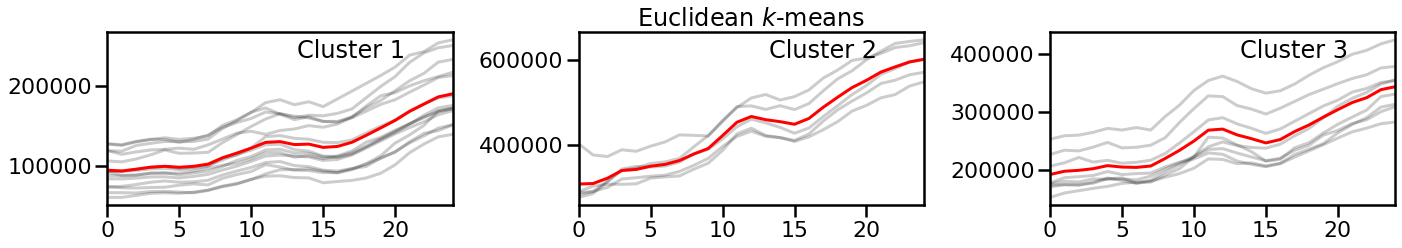

array([0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 2, 0, 0], dtype=int64)

In [1150]:
pred_real=plot_time_series_clusters(real_price_data.values, 3,'euclidean')
pred_real

In [1151]:
# sabe the values 
Bexar_county['cluster_realprices']=pred_real


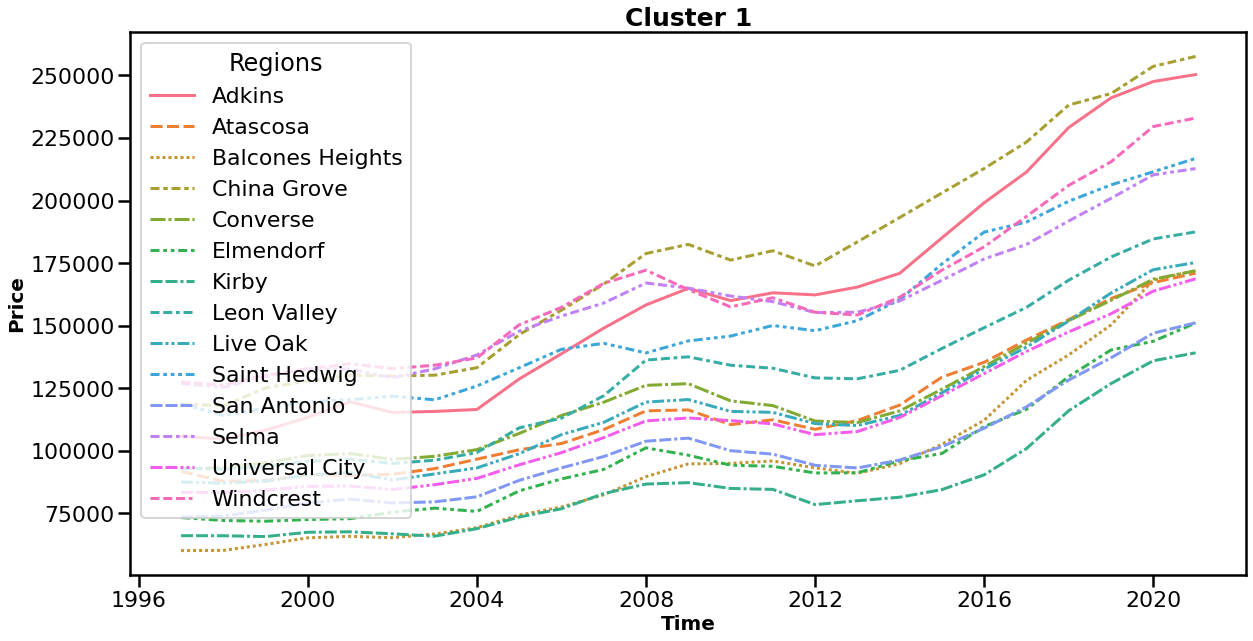

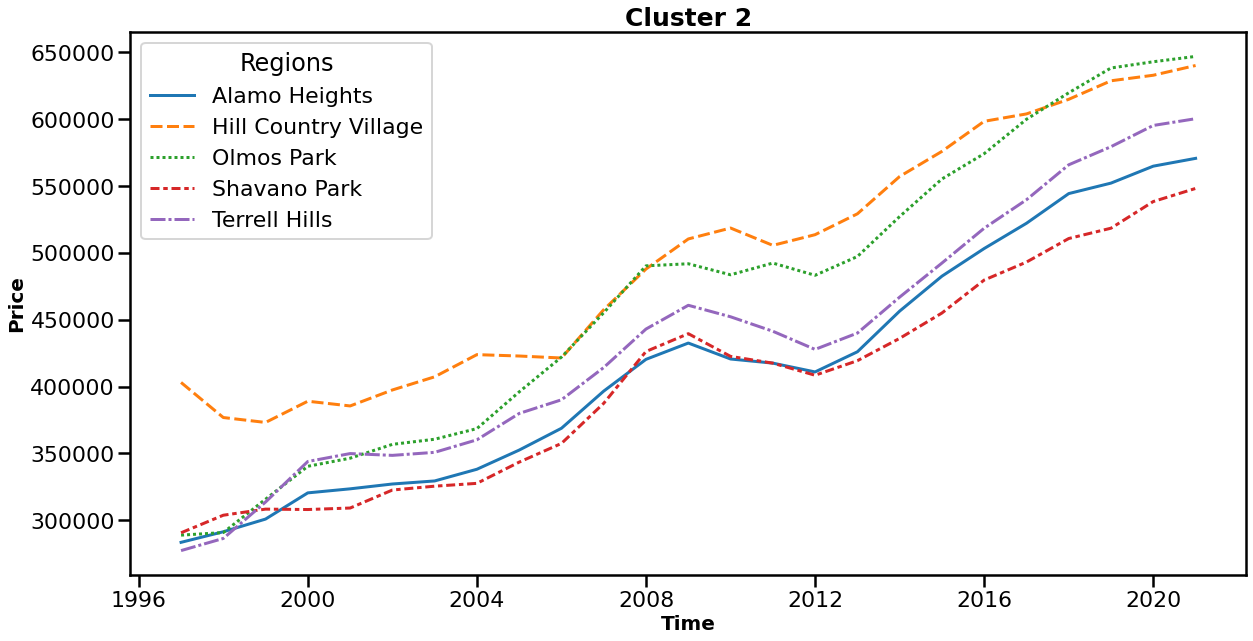

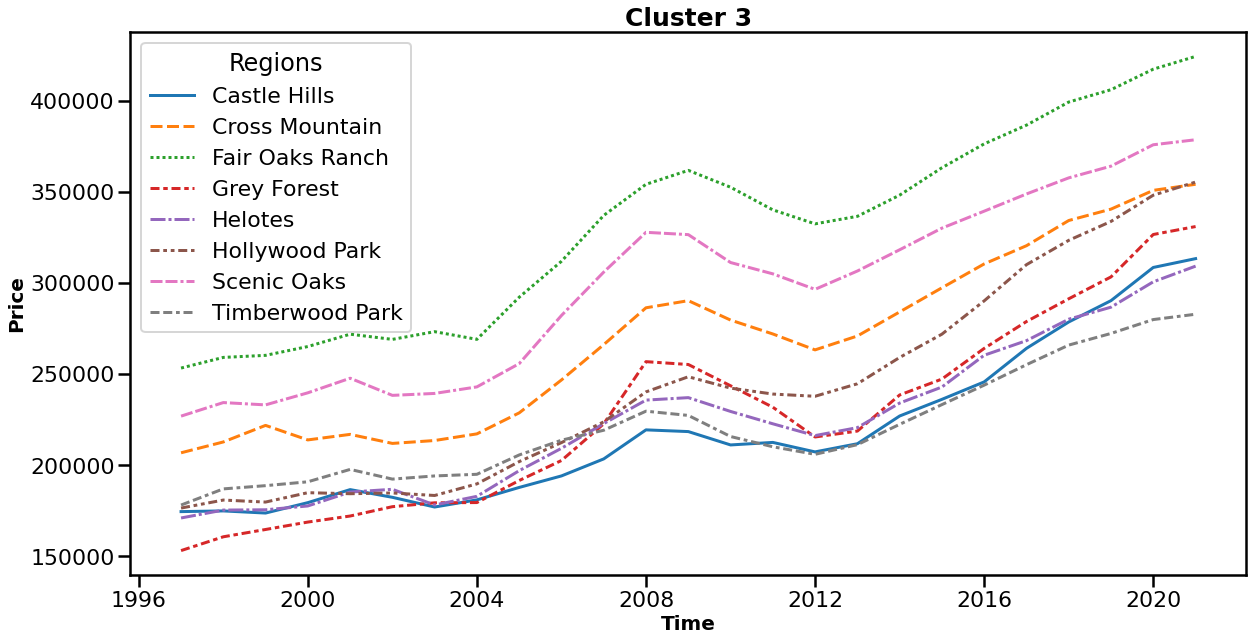

In [1152]:

for i in [0,1,2]:
    plt.figure()
    sns_plot=Bexar_county[Bexar_county['cluster_realprices']==i].set_index('index').rename_axis('Regions').T.iloc[:-2,:]
    ax=sns.lineplot(data=sns_plot)
    ax.set_title(f"Cluster {i+1}",fontsize=25, fontweight="bold")
    ax.set_xlabel('Time',fontsize=20, fontweight="bold")
    ax.set_ylabel('Price',fontsize=20, fontweight="bold")
    plt.show()

In [1153]:
Bexar_county_melt=Bexar_county.melt(id_vars=['cluster_realprices','cluster_normalizedprices','index'])
Bexar_county_melt.columns=[
 
 'cluster_realprices',
 'cluster_normalizedprices',
 'Region',
 'datatime',
 'price']
Bexar_county_melt['State']='Texas'
Bexar_county_melt['County']='Bexar County'
Bexar_county_melt['Location']=Bexar_county_melt['Region']+','+Bexar_county_melt['State']

Bexar_county_melt.head(2)


,cluster_realprices,cluster_normalizedprices,Region,datatime,price,State,County,Location
0,0,0,Adkins,1996-12-31,105873.818182,Texas,Bexar County,"Adkins,Texas"
1,1,1,Alamo Heights,1996-12-31,283388.090909,Texas,Bexar County,"Alamo Heights,Texas"


In [1154]:

Bexar_county_melt.to_csv('Bexar_county_clusters.csv')